In [1258]:
# Maria Camila Casas 201813057

In [1259]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.stats import linregress
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

# Tarea 3: Encuentre la regresión

Ud recibe unos datos $x$ y $y$ cómo se muestran a continuación. Ud debe responder cuatro preguntas a partir de estos datos. Suponga que ud tiene un modelo tal que $y=f(x)$ más aún desconoce $f$.

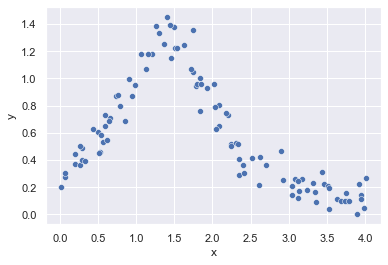

,x,y
0,0.065859,0.277413
1,0.020931,0.202239
2,0.070312,0.307369
3,0.206166,0.367530
4,0.286572,0.491144
...,...,...
95,3.922613,0.225565
96,3.898473,0.000000
97,3.952111,0.141005
98,3.939211,0.115500


In [1260]:
df = pd.read_pickle('ex1.gz')
sns.scatterplot(x='x',y='y',data=df)
plt.show()
df

## (A) Pendiente e intercepto
Determine la pendiente de los datos en el intervalo $[0,1.5]$ y el valor del intercepto con el eje $y$. Es decir, $f(0)=?$. ¿Cuál es el valor de $r^2$?


La pendiente m es: 0.7779804645799501
El intersecto b [f(0)] es: 0.20181394629697263
R2 es: 0.9640550260467952

Podemos confirmar los valores con linregress
LinregressResult(slope=0.7779804645799503, intercept=0.20181394629697247, rvalue=0.9640550260467952, pvalue=4.6790937701769215e-24, stderr=0.034334480234532755, intercept_stderr=0.030636008461571232)


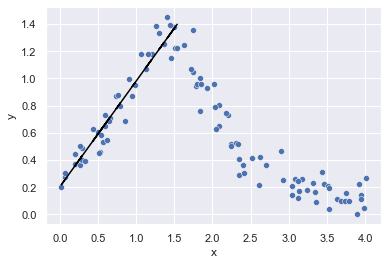

In [1261]:
from scipy.stats import linregress

a = df["x"]
x = a.values
x1 = x[0:41]

b = df["y"]
y = b.values
y1 = y[0:41]

datosIntervalo = 41
sumx1 = np.sum(x1)
sumy1 = np.sum(y1)

m = (np.sum(x1*y1) - sumx1*sumy1/datosIntervalo) / (np.sum(x1*x1) - (sumx1**2/datosIntervalo))
b = (sumy1 - m*sumx1)/datosIntervalo
f = m*x1 + b
r2 = "0.9640550260467952"

print("\nLa pendiente m es:",m)
print("El intersecto b [f(0)] es:",b)
print("R2 es:",r2)

print("\nPodemos confirmar los valores con linregress")
m1 = linregress(x1, y1)
print(m1)

sns.scatterplot(x='x',y='y',data=df)
plt.plot(x1,f,"black")


## (B) Regresión polinomial
Suponga que quiere realizar la siguiente regresión polinomial,
$$y=\beta_1+\beta_2x+\beta_2x^2+\beta_2x^3+\beta_2x^4+\beta_2x^5.$$
Plantee la función de costo que le permita calcular los coeficientes y calcule $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. ¿Cuál es el $r^2$?

Calcule $f(0)$ y compare con los resultados anteriores


Regresión Polinomial

       fun: 0.012552110996770262
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00056458, 0.0012752 , 0.0055212 , 0.02097328, 0.07582007,
       0.26963324])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 728
      nit: 85
     njev: 104
   status: 0
  success: True
        x: array([ 0.36260546, -0.85906418,  3.80088372, -3.01084542,  0.86017009,
       -0.08321564])

𝛽0: 0.36260546
𝛽1: -0.85906418
𝛽2: 3.80088372
𝛽3: -3.01084542
𝛽4:  0.86017009
𝛽5: -0.08321564

r2: 0.9199124804985841


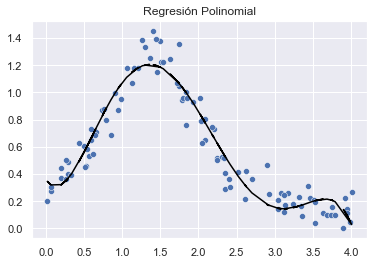

In [1262]:
def f(parametros,x):
    return parametros[0]+parametros[1]*x+parametros[2]*(x**2)+parametros[3]*(x**3)+parametros[4]*(x**4)+parametros[5]*(x**5)

def Lfit(parametros,x,y):
    deltaY=f(parametros,x) - y
    return np.dot(deltaY,deltaY)/len(y)

print("\nRegresión Polinomial")
e=1e-8
res1 = sp.optimize.minimize(fun=Lfit, x0=np.array([1,0,0,0,0,0]), args = (x,y), method='L-BFGS-B', tol=e)
print("\n",res1)

y_fit = f(res1.x,x)
r2 = 1-np.sum((y_fit-y)**2)/np.sum((y-y.mean())**2)

sns.scatterplot(x = x,y = y)
plt.plot(x,y_fit,'black')
plt.title("Regresión Polinomial")

print("\n𝛽0: 0.36260546")
print("𝛽1: -0.85906418")
print("𝛽2: 3.80088372")
print("𝛽3: -3.01084542")
print("𝛽4:  0.86017009")
print("𝛽5: -0.08321564")

print("\nr2:", r2)


## (C) Regresión polinomial exacta
Resulta, que cuando se quiere hacer alguna regresión polinomial esta se puede hacer de forma exacta. ¿Cómo? Suponga que ud va a considerar que su problema en lugar de tener $1$ variable ($x$) tiene $n+1$, siendo $n$ el orden del polinomio a ajustar. Es decir, sus nuevas variables van a ser $\{x_0,\,x_1,\,x_2,\,x_3,\dots,\,x_n\}$ definiendo $x_j=x^j$. Así pues, siguiendo el mismo procedimiento para la regresión lineal multidimensional que realizamos para el ejercicio de datos inmobiliarios, puede encontrar los valores de los coeficientes $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. Encuentre estos valores y compare con los resultados en la sección **(B)**.

Calcule $f(0)$ y compare con los resultados anteriores.

> Si ud se pregunta si esto es posible la respuesta es sí. Inclusive, esto se puede extender a cualquier a cualquier conjunto de funciones, tal que $x_j=f_j(x)$, que represente un conjunto "linealmente independiente" (¡Me estoy adelantando a *Fourier*!). Para quienes quieran explorar algunas curiosidades matemáticas, cuando $n+1$ es igual al número de puntos o valores de $x$ (y todos diferentes) la matriz es siempre invertible y resulta ser la inversa de una matriz de Vandermonde.

In [1263]:
Y = df.loc[:, ['y']]

Y

,y
0,0.277413
1,0.202239
2,0.307369
3,0.367530
4,0.491144
...,...
95,0.225565
96,0.000000
97,0.141005
98,0.115500



Regresión Polinomial Exacta

       fun: 0.012550553177941475
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00010923, -0.00024432, -0.00065403, -0.00194316, -0.00613778,
       -0.01991339])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 714
      nit: 71
     njev: 102
   status: 0
  success: True
        x: array([ 0.35677506, -0.83829013,  3.77690239, -2.99802149,  0.85692263,
       -0.08290568])

𝛽0: 0.35677506
𝛽1: -0.83829013
𝛽2: 3.77690239
𝛽3: -2.99802149
𝛽4: 0.85692263
𝛽5:  -0.08290568
Son similares a los de la parte B


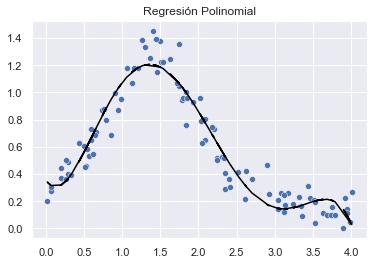

In [1264]:
X = df.loc[:, ['x']].rename(columns={'x': 'x1'})
X.insert(0, 'x0', 1)

X['x2'] = X['x1']*X['x1']
X['x3'] = X['x1']*X['x1']*X['x1']
X['x4'] = X['x1']*X['x1']*X['x1']*X['x1']
X['x5'] = X['x1']*X['x1']*X['x1']*X['x1']*X['x1']

def f(parametros,x):
    return parametros[0]+parametros[1]*x+parametros[2]*X['x2']+parametros[3]*X['x3']+parametros[4]*X['x4']+parametros[5]*X['x5']

def Lfit(parametros,x,y):
    deltaY=f(parametros,x) - y
    return np.dot(deltaY,deltaY)/len(y)

print("\nRegresión Polinomial Exacta")
e=1e-8
res1 = sp.optimize.minimize(fun=Lfit, x0=np.array([1,0,0,0,0,0]), args = (x,y), method='L-BFGS-B', tol=e)
print("\n",res1)
y_fit = f(res1.x,x)

sns.scatterplot(x = x,y = y)
plt.plot(x,y_fit,'black')
plt.title("Regresión Polinomial Exacta")

print("\n𝛽0: 0.35677506")
print("𝛽1: -0.83829013")
print("𝛽2: 3.77690239")
print("𝛽3: -2.99802149")
print("𝛽4: 0.85692263")
print("𝛽5:  -0.08290568")

print("Son similares a los de la parte B")


## (D) Regresión a un modelo teórico

Suponga que su modelo teórico es el siguiente:
$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$
Halle $a$, $b$, $c$ y $\gamma$.

Calcule $f(0)$ y compare con los resultados anteriores


Regresión a Modelo Teorico
      fun: 0.008230571432191247
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.26315100e-07,  1.98799312e-07, -9.95731276e-07,  6.20163640e-07])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 195
      nit: 31
     njev: 39
   status: 0
  success: True
        x: array([0.68740987, 1.39239372, 0.49566194, 0.93666128])

a: 0.68740987
b: 1.39239372
c: 0.49566194
y: 0.93666128


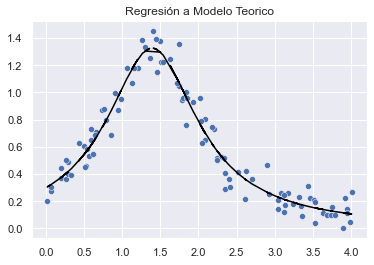

In [1265]:
def f(parametros,x):
    return parametros[0]/((((x-parametros[1])**2)+parametros[2])**parametros[3])

def Lfit(parametros,x,y):
    deltaY=f(parametros,x) - y
    return np.dot(deltaY,deltaY)/len(y)


print("\nRegresión a Modelo Teorico")
e=1e-8
res1 = sp.optimize.minimize(fun=Lfit, x0=np.array([1,1,0,0]), args = (x,y), method='L-BFGS-B', tol=e)
print(res1)

y_fit= f(res1.x,x)

sns.scatterplot(x=x,y=y)
plt.plot(x,y_fit,'black')
plt.title("Regresión a Modelo Teorico")

print("\na: 0.68740987")
print("b: 1.39239372")
print("c: 0.49566194")
print("y: 0.93666128")
